In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
import statistics


#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

# Homework 3

## Problem 1

**1a)** The first algorithm made 3 + 5 = 8 mistakes in total, and the second algorithm made 1 + 11 = 12 mistakes in total. Therefore, the second algorithm made more mistakes.

**1b)** The second algorithm is better for the zoo. As the question stated, it is really important to identify the birds correctly as we do not want them to escape. Although the second algorithm makes more mistakes, it has much higher accuracy in terms of identifying birds.

**1c)** We can first calculate the success rate for identifying birds and persons of both algorithms, and then calculate the numbers of birds/persons they will successfully identify given only 1% person.

In [2]:
bird_successRate_NN = 45 / (45 + 3)
person_successRate_NN = 47 / (47 + 5) #success Rate for NN

In [3]:
bird_successRate_NA= 47 / (47 + 1)
person_successRate_NA = 42 / (42 + 11) #success Rate for NA

Now, if we have 100 photos(samples), there will be only one photo of person and 99 photos of birds. Multiplying the success rate and number of photos together, we can have the successful numbers of birds/ persons of each algorithm.

In [4]:
num_birds = 99
num_person = 1
true_bird_NN_bird = bird_successRate_NN * num_birds
true_person_NN_bird = num_birds - true_bird_NN_bird
true_person_NN_person = person_successRate_NN * num_person
true_bird_NN_person = num_person - true_person_NN_person

print("NN bird, true bird:"  + str(true_bird_NN_bird))
print("NN bird, true person:"  + str(true_person_NN_bird))
print("NN person, true person:"  + str(true_person_NN_person))
print("NN person, true bird:"  + str(true_bird_NN_person))

NN bird, true bird:92.8125
NN bird, true person:6.1875
NN person, true person:0.9038461538461539
NN person, true bird:0.09615384615384615


In [5]:
true_bird_NA_bird = bird_successRate_NA * num_birds
true_person_NA_bird = num_birds - true_bird_NA_bird
true_person_NA_person = person_successRate_NA * num_person
true_bird_NA_person = num_person - true_person_NA_person

print("NA bird, true bird:"  + str(true_bird_NA_bird))
print("NA bird, true person:"  + str(true_person_NA_bird))
print("NA person, true person:"  + str(true_person_NA_person))
print("NA person, true bird:"  + str(true_bird_NA_person))

NA bird, true bird:96.9375
NA bird, true person:2.0625
NA person, true person:0.7924528301886793
NA person, true bird:0.2075471698113207


## Problem 2

**2a) What is the pdf of the sum of two identical exponential distributions?**

An exponential distribution is given by $$f(x) = \lambda e^{-\lambda x}$$

And the sum(convolution) of two identical distribution will be given by$s(t) = \int_{0}^{t} f(x) * f(t-x)dx = \int_{0}^{t}\lambda e^{-\lambda x}\lambda e^{-\lambda (t-x)}dx = \lambda ^2\int_{0}^{t} e^{-\lambda t}dx$

Notice that we use t as our upper bound and 0 as the loewr bound instead of $\infty$ in the definition of covolution, because t-x and x have to be positive in exponential distributions.

Continue the math: $s(t) =\lambda ^2\int_{0}^{t} e^{-\lambda t}dx = \lambda ^2te^{-\lambda t}$ 

**2b) What is the pdf of the ratio of two zero-mean unity variance normal distributions  X1/X2 ?**

$$ X_{1} = X_{2} = f(x) = \frac{1}{{\sqrt {2\pi }}}e^\frac{-x^2}{2}  $$

If $X = X_1 / X_2$, then $X(t)$ is given by $$X(t) = \int_{-\infty}^{\infty}|x|X_{1}(x)X_{2}(xt)dx$$ (source: Wikipedia:Ratio distribution)

$X(t) = \int_{-\infty}^{\infty} |x|\frac{1}{{\sqrt {2\pi }}}e^\frac{-x^2}{2} \frac{1}{{\sqrt {2\pi }}}e^\frac{-(xt)^2}{2}dx = \frac{1}{2\pi}\int_{-\infty}^{\infty}|x|e^{\frac{-x^2(1+t^2)}{2}}dx$

After solving this integral, the distribution of $X(t)$ is given by $$X(t) = \frac{1}{\pi(t^2+1)}$$

**2c) So far we have looked at 1D probability distributions, but it is possible to have a multi-dimensional vector distribution. A simple first introduction is the 2D Guassian; it looks like a smeared spot. Mathematically this is given by  Xi^+Yj^  where both  X  and  Y  are drawn from 1D Gaussian distributions. If I measure the amplitude of this vector, what is its pdf? (Hint, the amplitude is always positive.)**

The amplitude(length) of the vector Xi^+Yj^ will be $\sqrt{X^2 + Y^2}$. In another way, we have the pdf of the amplitude of the 2D Gaussian $Z = \sqrt{X^2 + Y^2}$. We can evaluate the cdf of Z by taking the double integrals.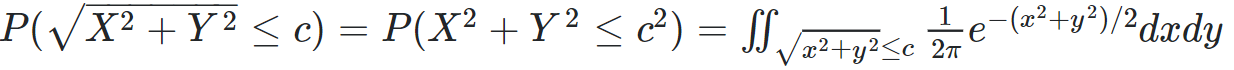

Then converting the integral into polar coordinates and make the integral solvable.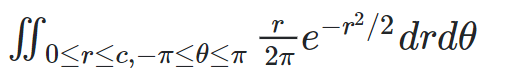

The final ansewr turns out to be a Rayleigh distribution. (Source: